<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/C9_Bullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset = '/content/drive/MyDrive/Colab Notebooks/DataSet/dataset.json'
df = pd.read_json(dataset, lines=True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Step 2: Preprocess the data
data = df['content'].tolist()
labels = df['annotation'].apply(lambda x: int(x['label'][0])).tolist()

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    tokens = text.lower().split()
    tagged_tokens = pos_tag(tokens)

    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = get_wordnet_pos(tag)
        if pos:
            lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
        else:
            lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

# Helper function to convert POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Step 3: Convert text to numerical representations
vectorizer = TfidfVectorizer(tokenizer= tokenizer)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 4: Train the model
model = SVC()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 6: Use the trained model for prediction on new data
new_comments = ["This is a friendly conversation.", "You're such a loser!"]
new_comments_transformed = vectorizer.transform(new_comments)
predictions = model.predict(new_comments_transformed)
print(predictions)


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2424
           1       0.88      0.91      0.89      1577

    accuracy                           0.92      4001
   macro avg       0.91      0.91      0.91      4001
weighted avg       0.92      0.92      0.92      4001

[0 1]


In [ ]:
# Step 5: Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 91.52711822044489 %


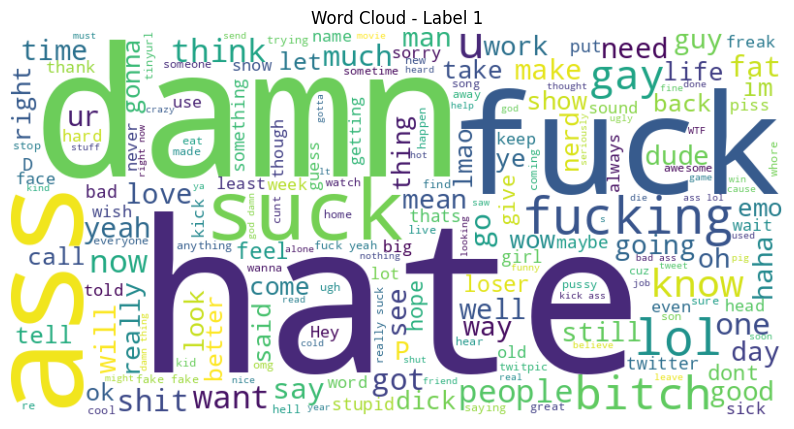

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the comments labeled as 1
label_1_comments = [comment for comment, label in zip(data, labels) if label == 1]

# Combine all the comments into a single string
text = ' '.join(label_1_comments)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Label 1')
plt.show()


In [ ]:
# Count the occurrences of label 1 and label 0
label_counts = {'label_0': labels.count(0), 'label_1': labels.count(1)}

# Display the counts
print('Label 0 count:', label_counts['label_0'])
print('Label 1 count:', label_counts['label_1'])


Label 0 count: 12179
Label 1 count: 7822


In [ ]:
pip install gradio

In [ ]:
import gradio as gr

# Load your trained model and vectorizer
# ...

# Define the function to make predictions
def predict_comment(comment):
    transformed_comment = vectorizer.transform([comment])
    prediction = model.predict(transformed_comment)[0]
    return "Bullying Comment" if prediction == 1 else "Non-Bullying Comment"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_comment,
    inputs=gr.inputs.Textbox(placeholder="Enter a comment"),
    outputs="text"
)

# Launch the interface
iface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
pip install flask


In [ ]:
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=4a5cfb0dfaa21803d375286a8a1c06e4b1690ffb9e60e88fd850da78208143f0
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
from flask import Flask, jsonify, request

# Load your trained model and vectorizer
# ...
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    comment = data['comment']

    transformed_comment = vectorizer.transform([comment])
    prediction = model.predict(transformed_comment)[0]
    label = "Bullying Comment" if prediction == 1 else "Non-Bullying Comment"

    result = {'prediction': label}
    return jsonify(result)
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
{
  "comment": "This is a test comment."
}
{
  "prediction": "Non-Bullying Comment"
}


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from pyngrok import ngrok

# Get the Flask app's port
port = 5000

# Start ngrok and generate a public URL
public_url = ngrok.connect(port).public_url
print(f"Public URL: {public_url}")


Public URL: https://587a-34-86-176-21.ngrok.io
